# Fulton County Vendor Payments Exploratory Data Analysis 

# Introduction: 

The purpose of this exploratory analysis project is to gain a better understanding of payments made by Fulton County to vendors from 2020 to 2023. In this project, we will identify and explore trends and patterns in the vendor payments dataset. Our goal is to answer the following questions: 

1. What trend is present in the vendor payments data from year to year? Is there any seasonality present in the data? 
2. How do trends in vendor payments vary from department to department? 
3. What characteristics define the largest vendor payments from year to year?

By answering these questions, we will better understand how Fulton County vendor payments systems typically work. This will provide us with insight into the general spending habits of the county from year to year and provide a general guideline for what to expect for future years. 

## Part I: Data Cleaning 

In [1]:
# import packages 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in data
df = pd.read_csv('Vendor_Payments.csv')
df.head()

,Fiscal Year,FY Period,Disbursement Date,Department Code,Department Name,Unit Code,Unit Name,Object,Object Name,Fund,...,Check Clearance or Cancel Date,Disbursement Document ID,Payment Document,Vendor Invoice Date,Vendor Invoice Number,City,Payment Type,Disbursement Week,Vendor Invoice Week,Check Clearance or Cancel Week
0,2024,1,26 January 2024,110,County Comm Clerk,1000,Co Comm-Clerk Of Comm,1164,Court Rep & Other Trans Serv,100,...,NaN,AD012524000000000485,"PVX,110,AMA0115",15 December 2023,2023-37,NaN,Paper,01/21/2024,12/10/2023,NaN
1,2024,1,26 January 2024,110,County Comm Clerk,1000,Co Comm-Clerk Of Comm,1164,Court Rep & Other Trans Serv,100,...,NaN,AD012524000000000486,"PVX,110,AMA0117",16 January 2024,2024-3,NaN,Paper,01/21/2024,01/14/2024,NaN
2,2024,1,26 January 2024,118,County Manager,BLJU,Backlog Juvenile Court,1160,Professional Services,448,...,29 January 2024,EFT01252400000000202,"CPVX,405,CPV506263",12 January 2024,273,NaN,Electronic,01/21/2024,01/07/2024,01/28/2024
3,2024,1,26 January 2024,118,County Manager,BLJU,Backlog Juvenile Court,1160,Professional Services,448,...,29 January 2024,EFT01252400000000220,"CPVX,405,CPV506260",10 January 2024,1043,NaN,Electronic,01/21/2024,01/07/2024,01/28/2024
4,2024,1,26 January 2024,118,County Manager,BLJU,Backlog Juvenile Court,1160,Professional Services,448,...,29 January 2024,EFT01252400000000220,"CPVX,405,CPV506261",11 January 2024,1044,NaN,Electronic,01/21/2024,01/07/2024,01/28/2024


In [3]:
# drop duplicates 
df = df.drop_duplicates()

In [4]:
# check columns 
df.columns

Index(['Fiscal Year', 'FY Period', 'Disbursement Date', 'Department Code',
       'Department Name', 'Unit Code', 'Unit Name', 'Object', 'Object Name',
       'Fund', 'Fund Name', 'Amount', 'Vendor Code', 'Vendor Legal Name',
       'Check Number', 'Check Status', 'Check Clearance or Cancel Date',
       'Disbursement Document ID', 'Payment Document', 'Vendor Invoice Date',
       'Vendor Invoice Number', 'City', 'Payment Type', 'Disbursement Week',
       'Vendor Invoice Week', 'Check Clearance or Cancel Week'],
      dtype='object')

In [5]:
# check dtype 
df.dtypes

Fiscal Year                         int64
FY Period                           int64
Disbursement Date                  object
Department Code                     int64
Department Name                    object
Unit Code                          object
Unit Name                          object
Object                             object
Object Name                        object
Fund                               object
Fund Name                          object
Amount                            float64
Vendor Code                        object
Vendor Legal Name                  object
Check Number                        int64
Check Status                       object
Check Clearance or Cancel Date     object
Disbursement Document ID           object
Payment Document                   object
Vendor Invoice Date                object
Vendor Invoice Number              object
City                               object
Payment Type                       object
Disbursement Week                 

In [6]:
# drop unecessary colummns 
df = df.drop(columns = ['Department Code', 'Unit Code', 'Object', 'Fund', 'Vendor Code', 'Check Number', 
                   'Disbursement Document ID', 'Payment Document',
                   'Disbursement Week', 'Vendor Invoice Week', 'Check Clearance or Cancel Week'])

In [7]:
# Check columns names and standardize them
df['Department Name'].unique()

array(['County Comm Clerk', 'County Manager',
       'Office of the County Auditor',
       'Department of Community Development', 'Senior Services',
       'Child Attorney', 'Tax Assessor', 'Regis & Elect',
       'HIV Elimination', 'Police', 'Sheriff Office', 'Medical Examiner',
       'Juvenile Court', 'Probate Court', 'County Marshal',
       'State Court-General', 'State Court-All Judges',
       'Superior Court-General', 'Superior Court-Alljudges',
       'Superior Court-Clerk', 'District Attorney', 'Public Defender',
       'Real Estate and Asset Management', 'Public Works', 'Library',
       'Health & Wellness', 'Non-Agency', 'Arts/Cooperative Extension',
       'Human Resources', 'Information Technology', 'Tax Commissioner',
       'Fire', 'State Court-Solicitor',
       'Diversity and Civil Rights Compliance', 'Purchasing',
       'Emergency Management', 'Commission District 4',
       'Economic Development', 'Finance', 'County Attorney',
       'Emergency Services',
       '

In [8]:
# Use of & vs and 
# Replace all & with and in Department Name and Object Name 
df['Department Name'] = df['Department Name'].str.replace('&', 'and')
df['Object Name'] = df['Object Name'].str.replace('&', 'and')
df['Fund Name'] = df['Fund Name'].str.replace('&', 'and')

In [9]:
# Standardize date formats
df['Disbursement Date'] = pd.to_datetime(df['Disbursement Date'])
df['Disbursement Date'] = df['Disbursement Date'].dt.strftime('%m/%d/%Y')

# Check Clearance or Cancel Date 
df['Check Clearance or Cancel Date'] = pd.to_datetime(df['Check Clearance or Cancel Date'])
df['Check Clearance or Cancel Date'] = df['Check Clearance or Cancel Date'].dt.strftime('%m/%d/%Y')

# Vendor Invoice Date 
df['Vendor Invoice Date'] = pd.to_datetime(df['Vendor Invoice Date'])
df['Vendor Invoice Date'] = df['Vendor Invoice Date'].dt.strftime('%m/%d/%Y')

In [10]:
# check data types
df.dtypes

Fiscal Year                         int64
FY Period                           int64
Disbursement Date                  object
Department Name                    object
Unit Name                          object
Object Name                        object
Fund Name                          object
Amount                            float64
Vendor Legal Name                  object
Check Status                       object
Check Clearance or Cancel Date     object
Vendor Invoice Date                object
Vendor Invoice Number              object
City                               object
Payment Type                       object
dtype: object

In [11]:
# Convert to date time 
df['Disbursement Date'] = pd.to_datetime(df['Disbursement Date'])
df['Check Clearance or Cancel Date'] = pd.to_datetime(df['Check Clearance or Cancel Date'])
df['Vendor Invoice Date'] = pd.to_datetime(df['Vendor Invoice Date'])

In [12]:
# Check values of columns 
df.describe()
# The minimum of Amount is negative

,Fiscal Year,FY Period,Disbursement Date,Amount,Check Clearance or Cancel Date,Vendor Invoice Date
count,205529.000000,205529.000000,205529,2.055290e+05,192556,205450
mean,2021.492125,7.378477,2022-01-24 14:40:29.823528704,1.214722e+04,2021-12-23 00:43:50.283138304,2021-11-28 07:53:14.458992384
min,2020.000000,1.000000,2020-01-08 00:00:00,-2.389709e+06,2020-01-10 00:00:00,1952-04-05 00:00:00
25%,2021.000000,5.000000,2021-02-19 00:00:00,1.119100e+02,2021-01-21 00:00:00,2020-12-29 00:00:00
50%,2021.000000,7.000000,2021-12-17 00:00:00,3.940000e+02,2021-11-22 00:00:00,2021-10-22 00:00:00
75%,2022.000000,10.000000,2022-12-23 00:00:00,1.545520e+03,2022-11-11 00:00:00,2022-11-04 00:00:00
max,2024.000000,12.000000,2024-01-26 00:00:00,1.991400e+07,2024-01-29 00:00:00,2024-01-23 00:00:00
std,1.102445,3.296570,NaN,1.505160e+05,NaN,NaN


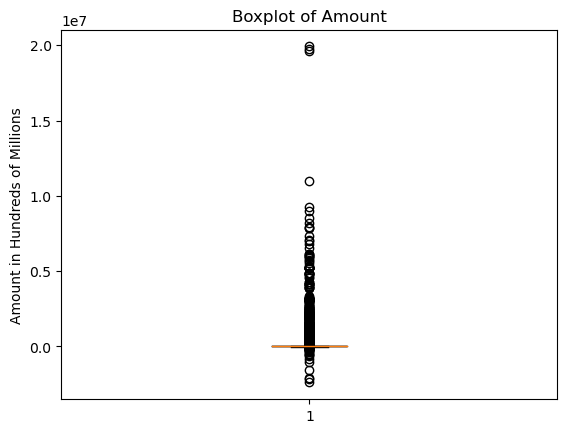

In [13]:
# Look at the distribution of the Amount column for outliers 
plt.boxplot(df['Amount'])
plt.title('Boxplot of Amount')
plt.ylabel('Amount in Hundreds of Millions')
plt.show()

There are multiple negative entries for the amount column. Are negative transaction amounts reasonable in this dataset? 

In [14]:
# Check the entry for min of Amount
df[df['Amount'] == df['Amount'].min()]
# It corresponds to check status is cancelled

,Fiscal Year,FY Period,Disbursement Date,Department Name,Unit Name,Object Name,Fund Name,Amount,Vendor Legal Name,Check Status,Check Clearance or Cancel Date,Vendor Invoice Date,Vendor Invoice Number,City,Payment Type
179709,2020,8,2020-08-15,Public Works,Public Works,Big Creek WRF Expansion,Water and Sewer R and E,-2389708.79,Archer Western-Brown and Caldwell Joint Venture,Cancelled,2020-08-15,2020-07-02,7-17RFP031617K-DJ,NaN,Electronic


In [15]:
# Check other negative values for amount
df[df['Amount'] < 0]
# Some negative transactions marked Disbursed/ Paid

,Fiscal Year,FY Period,Disbursement Date,Department Name,Unit Name,Object Name,Fund Name,Amount,Vendor Legal Name,Check Status,Check Clearance or Cancel Date,Vendor Invoice Date,Vendor Invoice Number,City,Payment Type
94,2024,1,2024-01-26,Superior Court-General,Superior Court - Court Administration,Court Transcripts,General,-212.85,KAREN MICHELE BOWES RIVERS,Disbursed,2024-01-29,2024-01-04,KR0009141,NaN,Electronic
1520,2023,12,2023-12-28,Information Technology,IT Management,Travel/Conference,General,-1276.52,PC-MISCELLANEOUS VENDOR,Disbursed,NaT,2023-10-23,2023-CREDITS,NaN,Paper
1632,2023,12,2023-12-28,County Marshal,State Court - Marshal Division,Travel/Conference,General,-103.46,PC-MISCELLANEOUS VENDOR,Disbursed,NaT,2023-08-01,07/16-08/16,NaN,Paper
1680,2023,12,2023-12-28,Superior Court-General,Pre-Trial Services,Travel/Conference,General,-427.01,"Marriott Hotel Service, Inc.",Disbursed,NaT,2023-09-20,10-2023CREDIT,NaN,Paper
1692,2023,12,2023-12-28,Superior Court-General,Mental Health Court 23-24,Travel/Conference,Grants,-71.55,CC-HOTEL,Disbursed,NaT,2023-09-25,84248183,NaN,Paper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201720,2020,2,2020-02-24,Public Works,Water Revenue,Motor Veh/Operating Supplies,Water and Sewer Revenue,-54.98,PEP BOYS,Paid,2020-02-27,2020-01-15,026746,NaN,Paper
201759,2020,2,2020-02-24,Library,Library-Public Service Operations,Recreational Supplies,General,-794.70,AMAZON.COM,Paid,2020-02-27,2019-07-23,112-4091051-8231464,NaN,Paper
201763,2020,2,2020-02-24,Library,Library Support Services,Office Supplies,General,-70.99,OFFICE DEPOT,Paid,2020-02-27,2019-11-27,408660327001,NaN,Paper
203511,2020,2,2020-02-04,Fulton County Board of Health,Administrative Services,Training Supplies,Fulton County Board of Health,-3590.00,Global Courseware Inc.,Cancelled,2020-02-04,2019-10-29,1011344,NaN,Paper


There are several consecutive transactions of the same value but positive instead of a negative transaction amount. This seems to indicate returns or corrections in the vendor payments. This indicates that negative values are possible for transaction amount. 

In [16]:
# Check if any missing values for amount
df['Amount'].isna().sum()

0

In [17]:
# Check for transactions that are 0
df[df['Amount'] == 0]

,Fiscal Year,FY Period,Disbursement Date,Department Name,Unit Name,Object Name,Fund Name,Amount,Vendor Legal Name,Check Status,Check Clearance or Cancel Date,Vendor Invoice Date,Vendor Invoice Number,City,Payment Type
1039,2023,12,2023-12-30,District Attorney,District Attorney,Fees,General,0.0,UNITED STATES POSTAL SERVICE,Disbursed,NaT,2023-04-26,24137463115300743744296,NaN,Other
1040,2023,12,2023-12-30,District Attorney,District Attorney,Fees,General,0.0,STAPLES,Disbursed,NaT,2023-05-17,9981901838,NaN,Other
1044,2023,12,2023-12-30,District Attorney,District Attorney,Fees,General,0.0,"Pure Gold Forensics, Inc.",Disbursed,NaT,2023-04-03,664,NaN,Other
3620,2023,12,2023-12-18,State Court-All Judges,State Court Judge - Morrison,Publications,General,0.0,Atlanta Business Chronicle,Disbursed,NaT,2023-09-25,505796293-2023,NaN,Paper
3652,2023,12,2023-12-18,State Court-All Judges,State Court Judge - Bessen,Juror Meals and Lodging,General,0.0,"J.E.L. ON A ROLL,INC.",Disbursed,NaT,2023-11-14,005292,NaN,Paper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200022,2020,3,2020-03-05,Information Technology,Technology Enterprise Applications,Travel/Conference,General,0.0,Frontier Airlines,Paid,2020-03-09,2020-01-21,OY6BGJ,NaN,Paper
200084,2020,3,2020-03-05,Superior Court-General,Pre-Trial Services,Travel/Conference,General,0.0,HOLIDAY INN,Paid,2020-03-09,2020-01-29,85856,NaN,Paper
201448,2020,2,2020-02-24,County Comm Clerk,Co Comm-Clerk Of Comm,Travel/Conference,General,0.0,JEKYLL ISLAND CLUB HOTEL,Paid,2020-02-27,2020-01-09,130877882,NaN,Paper
201658,2020,2,2020-02-24,District Attorney,District Attorney,Witness Fees-Other,General,0.0,"DELTA AIRLINES, INC",Paid,2020-02-27,2020-01-06,0067488589300,NaN,Paper


There are several 0 dollar vendor payments that are disbursed and paid. Since they are 0 dollar transactions they will be removed and will not be counted in the analysis.

In [18]:
# Drop 0 dollar amounts 
AmountDrpIdx = df[df['Amount'] == 0].index
df.drop(AmountDrpIdx, inplace = True)
df

,Fiscal Year,FY Period,Disbursement Date,Department Name,Unit Name,Object Name,Fund Name,Amount,Vendor Legal Name,Check Status,Check Clearance or Cancel Date,Vendor Invoice Date,Vendor Invoice Number,City,Payment Type
0,2024,1,2024-01-26,County Comm Clerk,Co Comm-Clerk Of Comm,Court Rep and Other Trans Serv,General,2481.45,Stacie Walker Alexander,Disbursed,NaT,2023-12-15,2023-37,NaN,Paper
1,2024,1,2024-01-26,County Comm Clerk,Co Comm-Clerk Of Comm,Court Rep and Other Trans Serv,General,1625.70,Stacie Walker Alexander,Disbursed,NaT,2024-01-16,2024-3,NaN,Paper
2,2024,1,2024-01-26,County Manager,Backlog Juvenile Court,Professional Services,American Rescue Plan,2000.00,SALLY BUTLER,Disbursed,2024-01-29,2024-01-12,273,NaN,Electronic
3,2024,1,2024-01-26,County Manager,Backlog Juvenile Court,Professional Services,American Rescue Plan,736.99,Deborah A Edwards,Disbursed,2024-01-29,2024-01-10,1043,NaN,Electronic
4,2024,1,2024-01-26,County Manager,Backlog Juvenile Court,Professional Services,American Rescue Plan,736.99,Deborah A Edwards,Disbursed,2024-01-29,2024-01-11,1044,NaN,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205524,2020,1,2020-01-08,Non-Agency,Utilities,Electricity,General,557.10,COWETA-FAYETTE ELECTRIC MEMBE-,Paid,2020-01-15,2020-01-02,6164CFEMC,NaN,Paper
205525,2020,1,2020-01-08,Non-Agency,Utilities,Electricity,General,8447.31,SAWNEE EMC,Paid,2020-01-14,2020-01-02,6166SEMC,NaN,Paper
205526,2020,1,2020-01-08,Non-Agency,Utilities,Electricity,General,2377.39,GREYSTONE POWER COMPANY,Paid,2020-01-14,2020-01-03,6171GSEMC,NaN,Paper
205527,2020,1,2020-01-08,Non-Agency,Utilities,Gas,General,1239.25,"GAS SOUTH, LLC",Paid,2020-01-15,2019-12-30,5285GS,NaN,Paper


In [19]:
# Check if any missing values for disbursement date
df['Disbursement Date'].isna().sum()

0

The dataset only includes the beginning of the 2024 fiscal year ao it will not be included in the analysis. 

In [20]:
# Remove 2024 from the dataset 
FYDrpIdx = df[df['Fiscal Year'] == 2024].index
df.drop(FYDrpIdx, inplace = True)
df

,Fiscal Year,FY Period,Disbursement Date,Department Name,Unit Name,Object Name,Fund Name,Amount,Vendor Legal Name,Check Status,Check Clearance or Cancel Date,Vendor Invoice Date,Vendor Invoice Number,City,Payment Type
1037,2023,12,2023-12-31,Non-Agency,General,Audit-Financial General,General,1265.00,GOVERNMENT FINANCE OFFICERS ASSOC.,Cancelled,2024-01-12,2023-12-26,13788COA22,NaN,Paper
1038,2023,12,2023-12-30,District Attorney,District Attorney,Rent/Lease Equipment,General,540.00,PC-MISCELLANEOUS VENDOR,Disbursed,NaT,2023-04-13,02052031,NaN,Other
1041,2023,12,2023-12-30,District Attorney,District Attorney,Fees,General,63.00,PC-MISCELLANEOUS VENDOR,Disbursed,NaT,2023-04-14,114-2023-INV-1,NaN,Other
1042,2023,12,2023-12-30,District Attorney,District Attorney,Fees,General,364.28,4 IMPRINT,Disbursed,NaT,2023-04-26,11132946,NaN,Other
1043,2023,12,2023-12-30,District Attorney,District Attorney,Fees,General,139.00,ABC Legal Services LLC,Disbursed,NaT,2023-03-29,13695137,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205524,2020,1,2020-01-08,Non-Agency,Utilities,Electricity,General,557.10,COWETA-FAYETTE ELECTRIC MEMBE-,Paid,2020-01-15,2020-01-02,6164CFEMC,NaN,Paper
205525,2020,1,2020-01-08,Non-Agency,Utilities,Electricity,General,8447.31,SAWNEE EMC,Paid,2020-01-14,2020-01-02,6166SEMC,NaN,Paper
205526,2020,1,2020-01-08,Non-Agency,Utilities,Electricity,General,2377.39,GREYSTONE POWER COMPANY,Paid,2020-01-14,2020-01-03,6171GSEMC,NaN,Paper
205527,2020,1,2020-01-08,Non-Agency,Utilities,Gas,General,1239.25,"GAS SOUTH, LLC",Paid,2020-01-15,2019-12-30,5285GS,NaN,Paper


## Part II: Exploratory Data Analysis 

In [21]:
# Summary of df 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204417 entries, 1037 to 205528
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Fiscal Year                     204417 non-null  int64         
 1   FY Period                       204417 non-null  int64         
 2   Disbursement Date               204417 non-null  datetime64[ns]
 3   Department Name                 204417 non-null  object        
 4   Unit Name                       204417 non-null  object        
 5   Object Name                     204417 non-null  object        
 6   Fund Name                       204417 non-null  object        
 7   Amount                          204417 non-null  float64       
 8   Vendor Legal Name               204417 non-null  object        
 9   Check Status                    204417 non-null  object        
 10  Check Clearance or Cancel Date  192131 non-null  datetime6

In [22]:
# Summary statistics 
df.describe()

,Fiscal Year,FY Period,Disbursement Date,Amount,Check Clearance or Cancel Date,Vendor Invoice Date
count,204417.000000,204417.000000,204417,2.044170e+05,192131,204338
mean,2021.479539,7.410450,2022-01-20 23:33:24.437986816,1.210239e+04,2021-12-21 16:03:43.347611392,2021-11-24 15:10:41.325646592
min,2020.000000,1.000000,2020-01-08 00:00:00,-2.389709e+06,2020-01-10 00:00:00,1952-04-05 00:00:00
25%,2021.000000,5.000000,2021-02-12 00:00:00,1.112400e+02,2021-01-20 00:00:00,2020-12-23 00:00:00
50%,2021.000000,7.000000,2021-12-15 00:00:00,3.920000e+02,2021-11-22 00:00:00,2021-10-20 00:00:00
75%,2022.000000,10.000000,2022-12-16 00:00:00,1.535960e+03,2022-11-10 00:00:00,2022-11-01 00:00:00
max,2023.000000,12.000000,2023-12-31 00:00:00,1.991400e+07,2024-01-25 00:00:00,2023-12-28 00:00:00
std,1.090601,3.273301,NaN,1.506680e+05,NaN,NaN


In [23]:
# Check how many null entries 
df.isnull().sum()

Fiscal Year                            0
FY Period                              0
Disbursement Date                      0
Department Name                        0
Unit Name                              0
Object Name                            0
Fund Name                              0
Amount                                 0
Vendor Legal Name                      0
Check Status                           0
Check Clearance or Cancel Date     12286
Vendor Invoice Date                   79
Vendor Invoice Number                 58
City                              202296
Payment Type                           0
dtype: int64

In [24]:
# Unique values 
df.nunique()

Fiscal Year                            4
FY Period                             12
Disbursement Date                    535
Department Name                       57
Unit Name                            750
Object Name                          478
Fund Name                             60
Amount                             74564
Vendor Legal Name                   6851
Check Status                           3
Check Clearance or Cancel Date      1038
Vendor Invoice Date                 1810
Vendor Invoice Number             167400
City                                  12
Payment Type                           3
dtype: int64

In [25]:
# lets look at highest vendor payments 
df.sort_values(by = 'Amount', ascending = False).head()

,Fiscal Year,FY Period,Disbursement Date,Department Name,Unit Name,Object Name,Fund Name,Amount,Vendor Legal Name,Check Status,Check Clearance or Cancel Date,Vendor Invoice Date,Vendor Invoice Number,City,Payment Type
2387,2023,12,2023-12-19,Non-Agency,Bond Retirement Reserve,Principal Due-12 Months,2020B WandS Sys Sinking Fund,19914000.00,U.S. BANK,Disbursed,NaT,NaT,NaN,NaN,Other
50841,2022,12,2022-12-26,Non-Agency,Bond Retirement Reserve,Principal Due-12 Months,2020B WandS Sys Sinking Fund,19718000.00,U.S. BANK,Disbursed,NaT,NaT,NaN,NaN,Other
100749,2021,12,2021-12-31,Non-Agency,Bond Retirement Reserve,Principal Due-12 Months,2020B WandS Sys Sinking Fund,19585000.00,U.S. BANK,Disbursed,NaT,NaT,NaN,NaN,Other
50055,2022,12,2022-12-30,Grady Hospital,ARP Covid response,Grady Hospital,American Rescue Plan,11000000.00,FULTON-DEKALB HOSPITAL AUTHORITY,Paid,2023-01-02,2022-12-28,ARPA,NaN,Electronic
173008,2020,10,2020-10-02,Public Works,Public Works,Big Creek Plant expansion,WandS Construction-2020,9244359.17,Archer Western-Brown and Caldwell Joint Venture,Paid,2020-10-05,2020-09-09,1-17RFP031617K-DJ(2B),NaN,Electronic


In [26]:
# Take a closer look at the largest vendor payment 
df.loc[2387]

Fiscal Year                                               2023
FY Period                                                   12
Disbursement Date                          2023-12-19 00:00:00
Department Name                                     Non-Agency
Unit Name                              Bond Retirement Reserve
Object Name                            Principal Due-12 Months
Fund Name                         2020B WandS Sys Sinking Fund
Amount                                              19914000.0
Vendor Legal Name                                    U.S. BANK
Check Status                                         Disbursed
Check Clearance or Cancel Date                             NaT
Vendor Invoice Date                                        NaT
Vendor Invoice Number                                      NaN
City                                                       NaN
Payment Type                                             Other
Name: 2387, dtype: object

The largest payment was made to U.S. Bank for a bond retirement reserve for the principal due for 12 months. 

In [27]:
# let's kook at vendor payment enteries by year
df.groupby('Fiscal Year').count()

,FY Period,Disbursement Date,Department Name,Unit Name,Object Name,Fund Name,Amount,Vendor Legal Name,Check Status,Check Clearance or Cancel Date,Vendor Invoice Date,Vendor Invoice Number,City,Payment Type
Fiscal Year,,,,,,,,,,,,,,
2020,47937,47937,47937,47937,47937,47937,47937,47937,47937,47854,47919,47926,327,47937
2021,58638,58638,58638,58638,58638,58638,58638,58638,58638,58351,58620,58622,1207,58638
2022,49721,49721,49721,49721,49721,49721,49721,49721,49721,49612,49698,49700,340,49721
2023,48121,48121,48121,48121,48121,48121,48121,48121,48121,36314,48101,48111,247,48121


2021 had the highest number of vendor payment entries overall with 58,638 vendor payments recorded which is drastically higher than the other years. 

In [28]:
# look at amount paid to vendors by year 
df1 = df.groupby('Fiscal Year').sum(numeric_only = True).sort_values(by = 'Amount', ascending = False)
df1 = pd.DataFrame(df1['Amount'])
df1

,Amount
Fiscal Year,
2023,6.768483e+08
2022,6.222740e+08
2020,6.055028e+08
2021,5.693095e+08


2023 has the highest amount paid to vendors overall while 2021 has the lowest amount paid to vendors. 

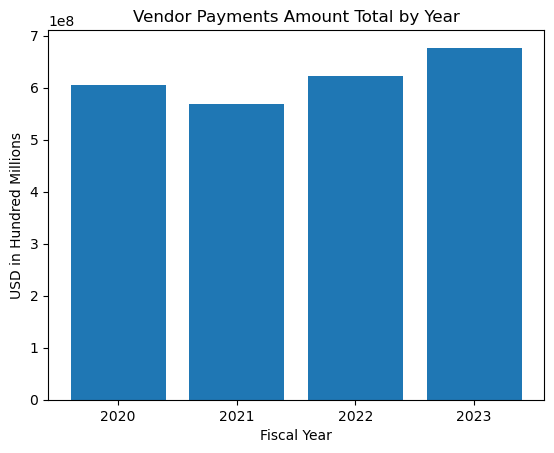

In [29]:
# Visualize vendor payments amount by year
plt.bar(df1.index, df1['Amount'])
plt.title('Vendor Payments Amount Total by Year')
plt.xlabel('Fiscal Year')
plt.ylabel('USD in Hundred Millions')
plt.xticks([2020, 2021, 2022, 2023])
plt.show()

In [30]:
# Pivot table for vendor payments by Fiscal Period 
pivot1 = pd.pivot_table(df, values = 'Amount', index = 'FY Period', columns = 'Fiscal Year', aggfunc = 'sum')
pivot1

Fiscal Year,2020,2021,2022,2023
FY Period,,,,
1,22591769.17,2.006140e+07,2.054536e+07,2.189344e+07
2,26855699.46,4.350809e+07,3.115571e+07,2.698271e+07
3,43257262.60,3.663988e+07,5.864923e+07,6.781148e+07
4,59421594.89,6.225399e+07,4.831460e+07,6.112322e+07
5,32237359.57,3.979129e+07,3.879273e+07,3.670887e+07
6,52604077.55,4.941941e+07,4.643269e+07,4.926131e+07
7,61137445.58,5.946668e+07,3.813069e+07,5.028589e+07
8,38342500.53,3.741425e+07,6.031498e+07,7.070626e+07
9,40251469.62,3.746317e+07,4.332942e+07,3.874304e+07


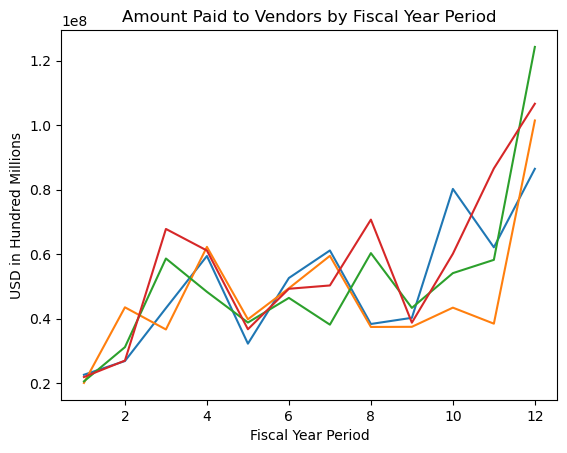

In [31]:
# Visualize vendor payments amount throughout the year 
plt.plot(pivot1)
plt.title('Amount Paid to Vendors by Fiscal Year Period')
plt.xlabel('Fiscal Year Period')
plt.ylabel('USD in Hundred Millions')
plt.show()

Spending drastically increased towards the end of the year every year. This change occurred sometime around November and continued until the end of year. What vendors are we paying the most for towards the end? Are there any vendors we are paying during this peak season of vendor payments that we are not paying at other times of the year?

In [32]:
# Seperate vendor payments to payments before November (Fiscal Period 11) 
# and from November to December (Fiscal Period 11 and 12)
PriorNovDf = df[df['FY Period'] <11]
NovDecDf= df[df['FY Period'] >= 11]

In [33]:
# Big ticket vendor payments during peak payments season
NovDecDf.sort_values(by = ['Amount'], ascending = False).head()

,Fiscal Year,FY Period,Disbursement Date,Department Name,Unit Name,Object Name,Fund Name,Amount,Vendor Legal Name,Check Status,Check Clearance or Cancel Date,Vendor Invoice Date,Vendor Invoice Number,City,Payment Type
2387,2023,12,2023-12-19,Non-Agency,Bond Retirement Reserve,Principal Due-12 Months,2020B WandS Sys Sinking Fund,19914000.0,U.S. BANK,Disbursed,NaT,NaT,NaN,NaN,Other
50841,2022,12,2022-12-26,Non-Agency,Bond Retirement Reserve,Principal Due-12 Months,2020B WandS Sys Sinking Fund,19718000.0,U.S. BANK,Disbursed,NaT,NaT,NaN,NaN,Other
100749,2021,12,2021-12-31,Non-Agency,Bond Retirement Reserve,Principal Due-12 Months,2020B WandS Sys Sinking Fund,19585000.0,U.S. BANK,Disbursed,NaT,NaT,NaN,NaN,Other
50055,2022,12,2022-12-30,Grady Hospital,ARP Covid response,Grady Hospital,American Rescue Plan,11000000.0,FULTON-DEKALB HOSPITAL AUTHORITY,Paid,2023-01-02,2022-12-28,ARPA,NaN,Electronic
10698,2023,11,2023-11-29,Public Works,Public Works,Big Creek Generator,Water and Sewer R and E,9018217.4,GEORGIA POWER CO,Paid,2023-12-06,2023-09-25,08430-10097-09/25/2023,NaN,Paper


Very large payments made to U.S. Bank Bond Retirement Reserve in the 12th FY Period. Let's see a count of payments by vendors during this time to get a better understanding of the payment behavior.

In [34]:
# Count of payments to each vendor 
NovDecDf['Vendor Legal Name'].value_counts().head(10)

Vendor Legal Name
AMAZON.COM                            3945
AT&T MOBILITY                         2044
OFFICE DEPOT                          1334
H&M Development and Management,LLC     833
Cintas Corporation                     618
HAPPY FACES PERSONNEL GP. INC.         617
CC-HOTEL                               578
STAPLES ADVANTAGE                      503
VDS                                    441
HOME DEPOT                             409
Name: count, dtype: int64

A ton of payments made to mostly retail chains and business services companies were made in the November to December period.

In [35]:
# Lets look at payments made by vendors
NovDecDf.groupby(by = ['Vendor Legal Name'])['Amount'].sum().sort_values(ascending = False)

Vendor Legal Name
U.S. BANK                                          1.079936e+08
Archer Western-Brown and Caldwell Joint Venture    4.963792e+07
FULTON-DEKALB HOSPITAL AUTHORITY                   3.933333e+07
VEOLIA WATER NORTH AMERICA                         3.830126e+07
NaphCare, Inc.                                     2.091005e+07
                                                       ...     
StandUp For Kids                                   0.000000e+00
WANDA DALLAS                                       0.000000e+00
Fortner Communications Inc                        -1.650000e+02
Nyoni Lavender                                    -2.000000e+03
Tradogram Inc.                                    -6.000000e+03
Name: Amount, Length: 3764, dtype: float64

We can see that largest vendor payment in the November to December period was made to U.S. Bank. 

Let's look at it by each year. Does it follow this general trend?

In [36]:
# For 2020 
NovDecDf[NovDecDf['Fiscal Year'] == 2020].groupby(by = ['Vendor Legal Name'])['Amount'].sum().sort_values(ascending = False).head()

Vendor Legal Name
Archer Western-Brown and Caldwell Joint Venture    12529727.99
VEOLIA WATER NORTH AMERICA                          8752759.50
U.S. BANK                                           8221068.33
NaphCare, Inc.                                      8155417.88
FULTON-DEKALB HOSPITAL AUTHORITY                    7083333.43
Name: Amount, dtype: float64

In [37]:
# For 2021
NovDecDf[NovDecDf['Fiscal Year'] == 2021].groupby(by = ['Vendor Legal Name'])['Amount'].sum().sort_values(ascending = False).head()

Vendor Legal Name
U.S. BANK                                          29600667.80
Archer Western-Brown and Caldwell Joint Venture    12523178.63
VEOLIA WATER NORTH AMERICA                         10242906.66
CITY OF ATLANTA                                     7817185.55
FULTON-DEKALB HOSPITAL AUTHORITY                    7083333.43
Name: Amount, dtype: float64

In [38]:
# For 2022
NovDecDf[NovDecDf['Fiscal Year'] == 2022].groupby(by = ['Vendor Legal Name'])['Amount'].sum().sort_values(ascending = False).head()

Vendor Legal Name
U.S. BANK                                          30134175.13
FULTON-DEKALB HOSPITAL AUTHORITY                   18083333.43
Archer Western-Brown and Caldwell Joint Venture    12564855.64
VEOLIA WATER NORTH AMERICA                          9944164.61
NaphCare, Inc.                                      6531968.14
Name: Amount, dtype: float64

In [39]:
# For 2023 
NovDecDf[NovDecDf['Fiscal Year'] == 2021].groupby(by = ['Vendor Legal Name'])['Amount'].sum().sort_values(ascending = False).head()

Vendor Legal Name
U.S. BANK                                          29600667.80
Archer Western-Brown and Caldwell Joint Venture    12523178.63
VEOLIA WATER NORTH AMERICA                         10242906.66
CITY OF ATLANTA                                     7817185.55
FULTON-DEKALB HOSPITAL AUTHORITY                    7083333.43
Name: Amount, dtype: float64

A similar group of companies make up the largest amount of vendor payments at the end of each year. The three financial institutions: U.S. Bank, Archer Western-Brown, and Caldwell Joint Venture make to it to the top 5 vendors every year during this period. Veolia Water North America and Fulton-Dekalb Hospital authority also make it to the top five vendor payments list for the November to December period every year. Are these vendor payments exclusive to the November to December period?

In [40]:
# How about all the other months? 
# For 2020
PriorNovDf[PriorNovDf['Fiscal Year'] == 2020].groupby(by = ['Vendor Legal Name'])['Amount'].sum().sort_values(ascending = False).head()

Vendor Legal Name
FULTON-DEKALB HOSPITAL AUTHORITY                   35416667.57
Archer Western-Brown and Caldwell Joint Venture    27712045.98
WINTER JOHNSON GROUP                               21986961.78
NaphCare, Inc.                                     16140177.65
VEOLIA WATER NORTH AMERICA                         11357538.67
Name: Amount, dtype: float64

In [41]:
# For 2021
PriorNovDf[PriorNovDf['Fiscal Year'] == 2021].groupby(by = ['Vendor Legal Name'])['Amount'].sum().sort_values(ascending = False).head()

Vendor Legal Name
Archer Western-Brown and Caldwell Joint Venture    46009140.39
FULTON-DEKALB HOSPITAL AUTHORITY                   35416667.57
NaphCare, Inc.                                     18908649.28
VEOLIA WATER NORTH AMERICA                         14676603.06
CORE Community Organized Relief Effort             10264653.18
Name: Amount, dtype: float64

In [42]:
# For 2022
PriorNovDf[PriorNovDf['Fiscal Year'] == 2022].groupby(by = ['Vendor Legal Name'])['Amount'].sum().sort_values(ascending = False).head()

Vendor Legal Name
Archer Western-Brown and Caldwell Joint Venture    65680130.07
FULTON-DEKALB HOSPITAL AUTHORITY                   35416667.57
NaphCare, Inc.                                     19446599.10
VEOLIA WATER NORTH AMERICA                         15601475.53
U.S. BANK                                          11500176.80
Name: Amount, dtype: float64

In [43]:
# For 2023
PriorNovDf[PriorNovDf['Fiscal Year'] == 2023].groupby(by = ['Vendor Legal Name'])['Amount'].sum().sort_values(ascending = False).head()

Vendor Legal Name
Archer Western-Brown and Caldwell Joint Venture    59159683.21
FULTON-DEKALB HOSPITAL AUTHORITY                   35416667.60
WINTER JOHNSON GROUP                               23419336.39
VEOLIA WATER NORTH AMERICA                         18315813.06
NaphCare, Inc.                                     13212977.56
Name: Amount, dtype: float64

Similar institutions make up the largest vendor payments throughout the rest of the year. The only exception to this is U.S. Bank which only makes it to the largest vendor payments list at the end of the year. 

Are there vendors we us specifically only at the end of the year? Is there a seasonality in the vendors used?

In [44]:
# List of vendors before Nov
PriorNovVen = PriorNovDf['Vendor Legal Name'].unique()

#list of Vendors Nov - Dec 
NovDecVen = NovDecDf['Vendor Legal Name'].unique()

In [45]:
# Check for vendor not used 
vendors = []
for vendor in NovDecVen: 
    if vendor not in PriorNovVen: 
        vendors.append(vendor)
        
# View first few entries
vendors[:10]

['James Bendall',
 'PLAZA THEATRE FOUNDATION INC',
 'Emmy Marshall',
 'Dwight Eubanks',
 'Brooks Hatton Emanuel',
 'Aduke Aremu Production LLC',
 'Rotary International-Rotary Club of North Fulton',
 'Kynekt, LLC.',
 'EARTHCHANNEL COMMUNICATIONS, INC.',
 'Ice Cream on Wheels Inc.']

Are there any patterns in the vendors used only from November to December?

In [46]:
# Transactions using this vendor
NovDecVen = NovDecDf['Vendor Legal Name'].isin(vendors)
NovDecVenTrans = NovDecDf[NovDecVen]
NovDecVenTrans.sort_values(by = 'Amount', ascending = False).head(10)

,Fiscal Year,FY Period,Disbursement Date,Department Name,Unit Name,Object Name,Fund Name,Amount,Vendor Legal Name,Check Status,Check Clearance or Cancel Date,Vendor Invoice Date,Vendor Invoice Number,City,Payment Type
6178,2023,12,2023-12-13,Non-Agency,General,Morehouse Services,General,1498516.06,Morehouse Healthcare Inc,Paid,2023-12-14,2023-10-25,EPFC07092023,NaN,Electronic
6179,2023,12,2023-12-13,Non-Agency,General,Morehouse Services,General,980207.00,Morehouse Healthcare Inc,Paid,2023-12-14,2023-10-25,EPFC102023,NaN,Electronic
105355,2021,12,2021-12-03,Department of Community Development,ARP Covid response,Food Insecurity,American Rescue Plan,395000.00,Wholesome Wave Georgia Incorporated,Paid,2021-12-06,2021-10-01,8,NaN,Electronic
105039,2021,12,2021-12-10,Public Works,Public Works,Dot Line Relocation,Water and Sewer R and E,341050.71,"North Perimeter Contractors, LLC",Paid,2022-01-13,2021-07-21,NPC-07-001,NaN,Paper
57426,2022,11,2022-11-22,Non-Agency,Fult Co Employ Retirement Syst,Pension Xfer To Dc,Fult Co Employees Retire Syst,330256.86,MASS MUTUAL DEFINED BENEFIT SERVICES,Paid,2022-11-22,NaT,NaN,NaN,Other
2165,2023,12,2023-12-22,Real Estate and Asset Management,Public Buildings,Central warehouse buildouts,Capital Improvements,264760.00,"Tuxedo Logistics, LLC",Disbursed,NaT,2023-11-30,FC-RW001,NaN,Paper
166136,2020,11,2020-11-18,Regis and Elect,COVID-19,Stock Paper Print Out'S,CARES ACT COVID,223372.50,"RUNBECK ELECTION SERVICES, INC.",Paid,2020-11-25,2020-10-22,A004317,NaN,Paper
11054,2023,11,2023-11-22,Superior Court-General,Superior Court - Juries,Software License,General,214461.00,Jury Systems Incorporated,Paid,2023-12-14,2023-10-16,6410,NaN,Paper
7295,2023,12,2023-12-08,Non-Agency,General,Claims-General,General,185690.00,U.S. TREASURY INTERNAL REVENUE SERVICE,Disbursed,NaT,2023-11-27,58-6001729,NaN,Paper
7063,2023,12,2023-12-08,District Attorney,District Attorney,Professional Services,General,150878.06,"Thomas, Ferguson and Beskind L.L.P",Paid,2023-12-21,2023-09-19,100,NaN,Paper


There are certain vendors that are used exclusively in the November to December Period. 

In [47]:
# pivot table for vendor payments by department 
pivot = pd.pivot_table(df, values = 'Amount', index = 'Department Name', columns = 'Fiscal Year', aggfunc = 'sum')
pivot

Fiscal Year,2020,2021,2022,2023
Department Name,,,,
Arts/Cooperative Extension,4.068253e+06,2.328531e+06,3.563165e+06,6.684600e+06
At Large,2.277187e+04,1.300019e+04,2.134377e+04,2.169751e+04
Child Attorney,1.191119e+05,3.325892e+04,3.015372e+04,3.504057e+04
Commission District 1,3.229998e+04,4.490209e+04,4.769478e+04,3.499812e+04
Commission District 2,2.623780e+03,1.239150e+03,2.473010e+03,6.364400e+03
Commission District 3,1.741830e+03,1.736390e+03,3.215340e+03,4.211042e+04
Commission District 4,3.274910e+04,2.315847e+04,5.378543e+04,6.592651e+04
Commission District 5,3.124883e+04,1.290770e+04,5.614931e+04,5.159422e+04
Commission District 6,5.866185e+04,3.298796e+04,6.491313e+04,6.244885e+04


Let's take a look at the hightest vendor payments by department.

In [48]:
# 2020 highest payment by department
highest_2020 = pd.DataFrame(pivot.loc[:, 2020].sort_values(ascending = False).head(10))
highest_2020

,2020
Department Name,
Public Works,1.376911e+08
Non-Agency,1.040254e+08
Real Estate and Asset Management,6.047684e+07
Library,5.859074e+07
Grady Hospital,4.439689e+07
Ryan White,2.698767e+07
Regis and Elect,2.697680e+07
Information Technology,1.998134e+07
Senior Services,1.719994e+07


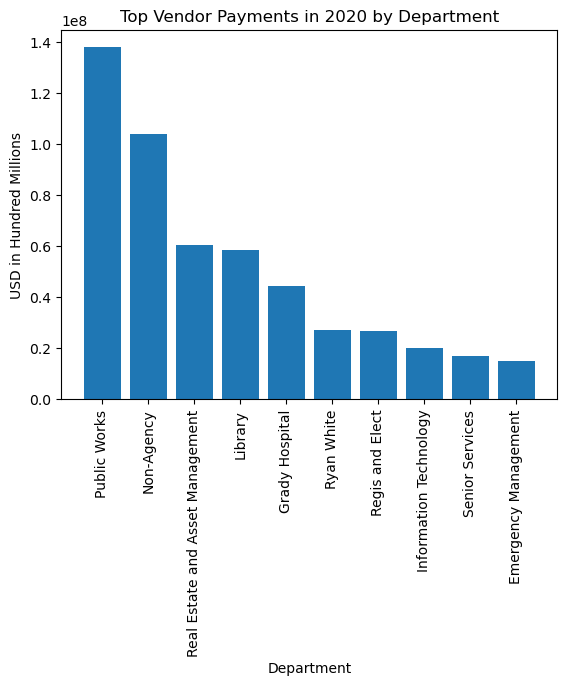

In [49]:
# Visualize top vendor payments by department in 2020
plt.bar(highest_2020.index, highest_2020[2020])
plt.title('Top Vendor Payments in 2020 by Department')
plt.xlabel('Department')
plt.ylabel('USD in Hundred Millions')
plt.xticks(rotation = 90)
plt.show()

In [50]:
# 2021 highest vendor payments by department
highest_2021 = pd.DataFrame(pivot.loc[:, 2021].sort_values(ascending = False).head(10))
highest_2021

,2021
Department Name,
Public Works,1.591329e+08
Non-Agency,8.038143e+07
Real Estate and Asset Management,5.161974e+07
Grady Hospital,4.296405e+07
Department of Community Development,3.785640e+07
Sheriff Office,3.689281e+07
Ryan White,2.612120e+07
Senior Services,1.666813e+07
Information Technology,1.612683e+07


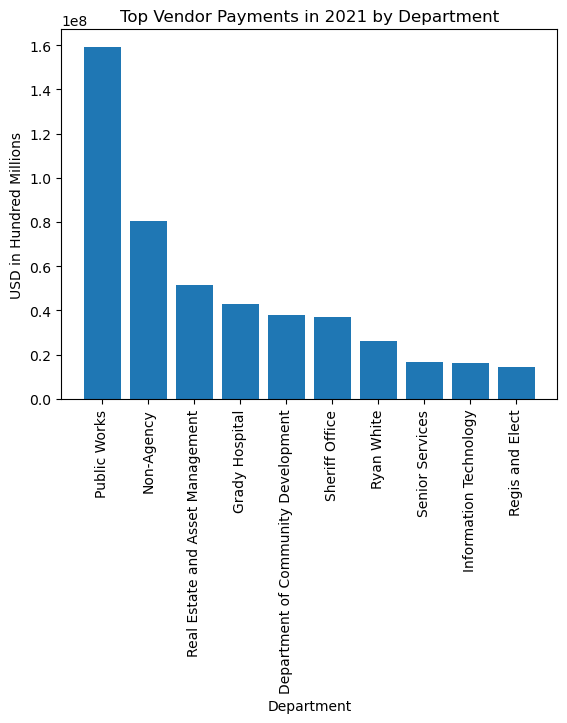

In [51]:
# Visualize top vendor payments in 2021
plt.bar(highest_2021.index, highest_2021[2021])
plt.title('Top Vendor Payments in 2021 by Department')
plt.xlabel('Department')
plt.ylabel('USD in Hundred Millions')
plt.xticks(rotation = 90)
plt.show()

In [52]:
# 2022 Highest payment by department
highest_2022 = pd.DataFrame(pivot.loc[:, 2022].sort_values(ascending = False).head(10))
highest_2022

,2022
Department Name,
Public Works,1.730073e+08
Non-Agency,7.796229e+07
Real Estate and Asset Management,6.252095e+07
Grady Hospital,5.441765e+07
Sheriff Office,3.888728e+07
HIV Elimination,2.997301e+07
Department of Community Development,2.808029e+07
Information Technology,2.299448e+07
Senior Services,1.891643e+07


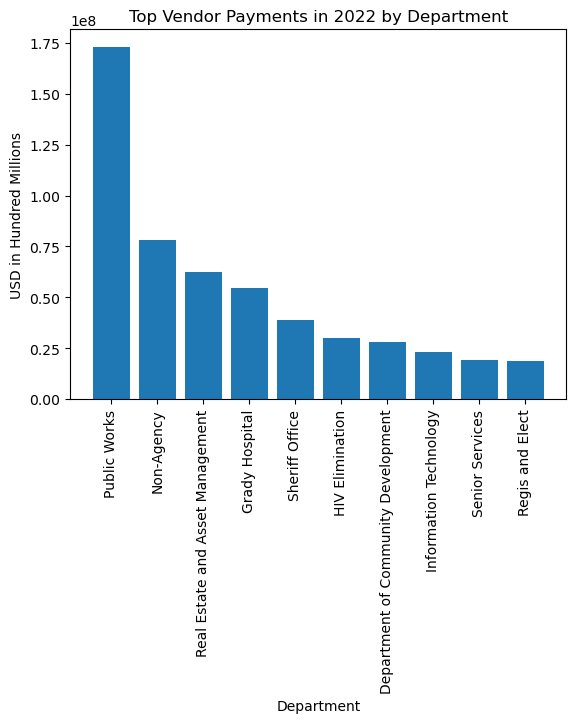

In [53]:
# Visualize top vendor payments in 2022
plt.bar(highest_2022.index, highest_2022[2022])
plt.title('Top Vendor Payments in 2022 by Department')
plt.xlabel('Department')
plt.ylabel('USD in Hundred Millions')
plt.xticks(rotation = 90)
plt.show()

In [54]:
# 2023 highest payment by department
highest_2023 = pd.DataFrame(pivot.loc[:, 2023].sort_values(ascending = False).head(10))
highest_2023

,2023
Department Name,
Public Works,1.885433e+08
Non-Agency,1.069502e+08
Real Estate and Asset Management,9.230446e+07
Sheriff Office,4.590329e+07
Grady Hospital,4.346756e+07
HIV Elimination,3.491412e+07
Information Technology,2.576533e+07
Senior Services,2.369325e+07
Department of Community Development,1.406361e+07


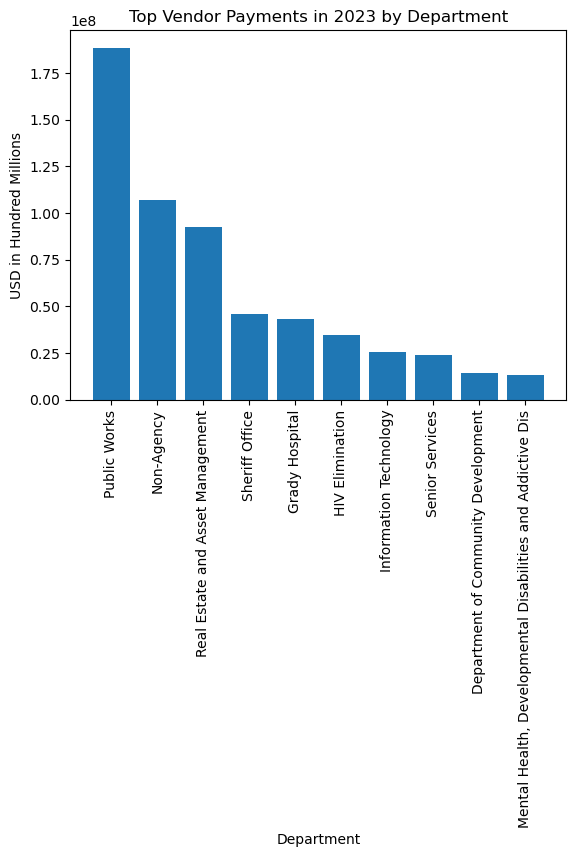

In [55]:
# Visualize top vendor payments in 2023
plt.bar(highest_2023.index, highest_2023[2023])
plt.title('Top Vendor Payments in 2023 by Department')
plt.xlabel('Department')
plt.ylabel('USD in Hundred Millions')
plt.xticks(rotation = 90)
plt.show()

The same departments contribute to the highest vendor payments year after year with Public Works, Non-Agency, and Real Estate and Asset Management making up the top three departments with the largest total vendor payments amount. 

# Conclusion: 

Overall, there is an increase in the total amount paid to vendors from year to year. The highest total amount for vendor payments occurred in 2023, and the lowest total amount for vendor payments occurred in 2021. Furthermore, the largest number of vendor payments occurred in 2021, and the smallest number of vendor payments occurred in 2020. The three largest vendor payments overall are to U.S. Bank. 

There is seasonality present in the data as spending drastically increases at the end of the year typically from November to December. The largest payments were made to U.S. Bank for a bond retirement reserve for the principal due for 12 months in the 12th FY period. A lot of payments were made to retail chains and business service companies in the November to December period.  The three financial institutions: U.S. Bank, Archer Western-Brown, and Caldwell Joint Venture are in the top five vendor payments every year. Veolia Water North America and Fulton-Dekalb Hospital Authority are also in the top five vendor payments list for the November to December period every year. However, these same vendors constitute the largest vendor payments throughout the rest of the year as well except for U.S. Bank which only makes it to the largest vendor payments list at the end of the year. Additionally, the same departments contribute to the highest vendor payments year after year with Public Works, Non-Agency, and Real Estate and Asset Management making up the top three departments with the largest total vendor payments made.